In [183]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **1. Load the dataset into python environment**
# **2. Make ‘PassengerId’ as the index column**


In [184]:
data = pd.read_csv('/content/titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **3. Check the basic details of the dataset**

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [186]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **4. Fill in all the missing values present in all the columns in the dataset**

In [187]:
# Age,Embarked and Cabin have missing values
data.isna().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [188]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [189]:
data.shape

(891, 11)

In [190]:
data['Age'].mean()


29.69911764705882

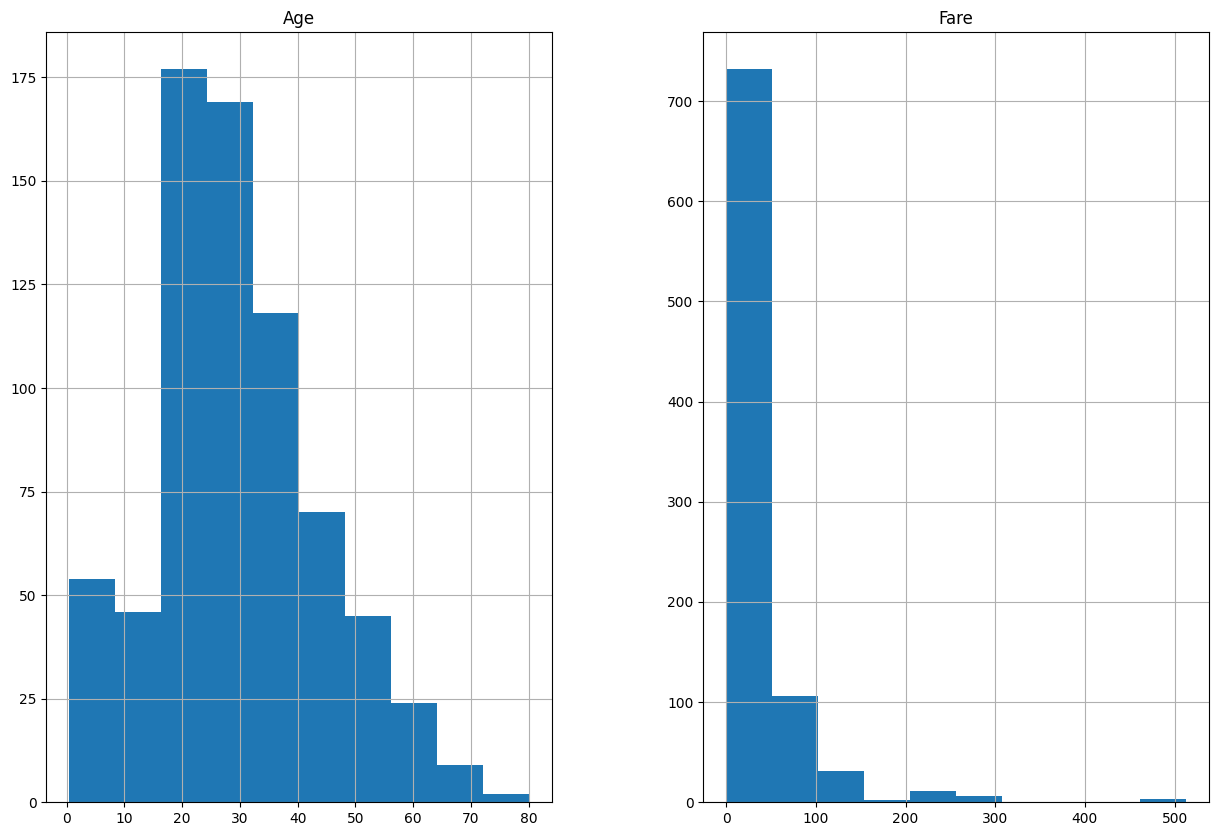

In [191]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(15,10));

In [192]:
# Using Mean in Imputer method to fill missing values in Age column which is numerical
num_col = ['Age']

In [193]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
data[num_col]=imputer.fit_transform(data[num_col])

In [194]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [195]:
data.shape

(891, 11)

In [196]:
# Using Mode() to fill the values missing from 'Cabin' & 'Embarked'

data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [197]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [198]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [199]:
#All missing/null values have been filled out
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [200]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


# **5. Check and handle outliers in at least 3 columns in the dataset**

Taking Age ,Fare and SibSp(Siblings or Spouse) for handling

As we can see each category has far lying outliers.

<Axes: xlabel='Age'>

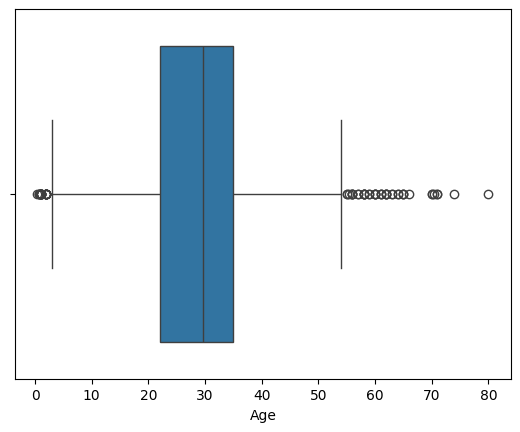

In [201]:
sns.boxplot(x=data['Age'])

<Axes: xlabel='SibSp'>

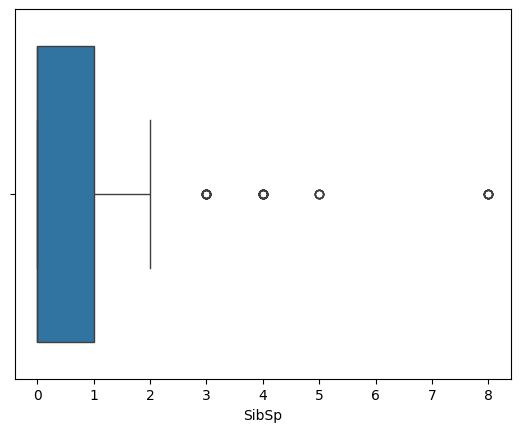

In [202]:
sns.boxplot(x=data['SibSp'])

<Axes: xlabel='Fare'>

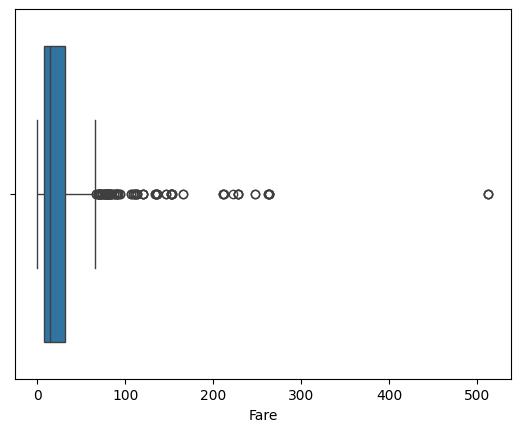

In [203]:
sns.boxplot(x=data['Fare'])

# We can IQR method for handling all the outlying categories

IQR Method for age

In [204]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

13.0


In [205]:
up = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR

print("Upper limit is ",up)
print("Lower limit is ",low)

Upper limit is  54.5
Lower limit is  2.5


In [206]:
def lim_imputer(value):
  if value>up:
    return up
  if value<low:
    return low
  else:
    return value

In [207]:
data['Age'] = data['Age'].apply(lim_imputer)

<Axes: xlabel='Age'>

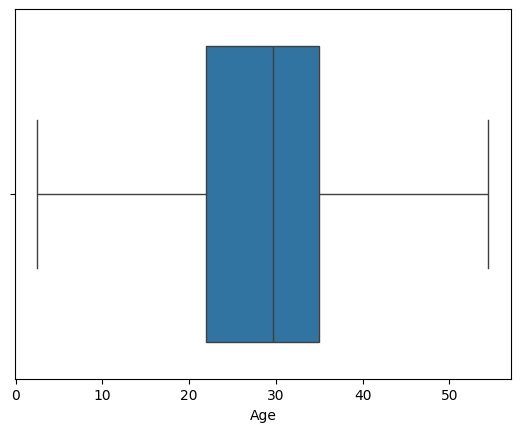

In [208]:
sns.boxplot(x=data['Age'])

IQR Method for SibSp

In [209]:
Q1 = data['SibSp'].quantile(0.25)
Q3 = data['SibSp'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

1.0


In [210]:
up = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR

print("Upper limit is ",up)
print("Lower limit is ",low)

Upper limit is  2.5
Lower limit is  -1.5


In [211]:
def lim_imputer(value):
  if value>up:
    return up
  if value<low:
    return low
  else:
    return value

In [212]:
data['SibSp'] = data['SibSp'].apply(lim_imputer)

<Axes: xlabel='SibSp'>

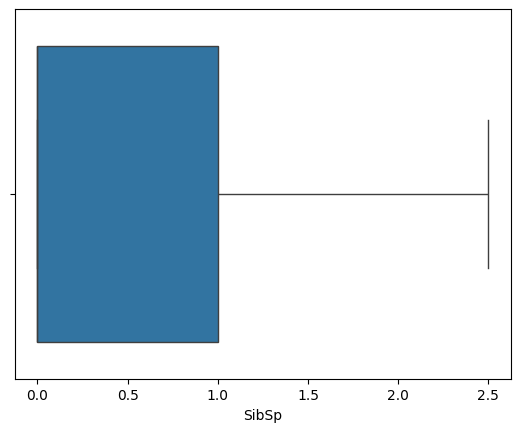

In [213]:
sns.boxplot(x=data['SibSp'])

IQR method for Fare

In [214]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

23.0896


In [215]:
up = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR

print("Upper limit is ",up)
print("Lower limit is ",low)

Upper limit is  65.6344
Lower limit is  -26.724


In [216]:
def lim_imputer(value):
  if value>up:
    return up
  if value<low:
    return low
  else:
    return value

In [217]:
data['Fare'] = data['Fare'].apply(lim_imputer)

<Axes: xlabel='Fare'>

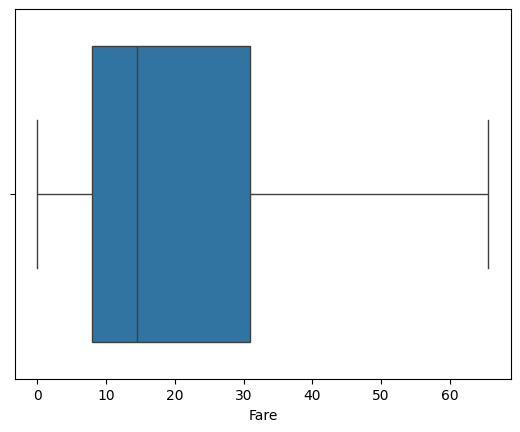

In [218]:
sns.boxplot(x=data['Fare'])

# **6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [219]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp       float64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [220]:
#We took Survived as target variable for MinMax Scaling
data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [221]:
from sklearn.preprocessing import MinMaxScaler
mima_scaler = MinMaxScaler()

In [222]:
df = data.drop(['Name','Cabin','Embarked','Ticket','Sex'],axis =1)

In [223]:
og_scaled = mima_scaler.fit_transform(df)

In [224]:
new_scaled = pd.DataFrame(og_scaled)
new_scaled.head(10)

,0,1,2,3,4,5
0,0.0,1.0,0.375000,0.4,0.000000,0.110460
1,1.0,0.0,0.682692,0.4,0.000000,1.000000
2,1.0,1.0,0.451923,0.0,0.000000,0.120745
3,1.0,0.0,0.625000,0.4,0.000000,0.809027
4,0.0,1.0,0.625000,0.0,0.000000,0.122649
5,0.0,1.0,0.523060,0.0,0.000000,0.128870
6,0.0,0.0,0.990385,0.0,0.000000,0.790173
7,0.0,1.0,0.000000,1.0,0.166667,0.321097
8,1.0,1.0,0.471154,0.0,0.333333,0.169626
9,1.0,0.5,0.221154,0.4,0.000000,0.458156
